In [1]:
import sys
import pathlib
sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent)))

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

from src.particle_funcs import distance_matrix as distance_matrix
import src.leap_funcs.qubo.q_matrix as q_matrix

import gurobipy

[1. 0. 0. ... 0. 0. 1.]


C:\Users\oahre\AppData\Local\Temp\ipykernel_17148\3895945198.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_initial.show()


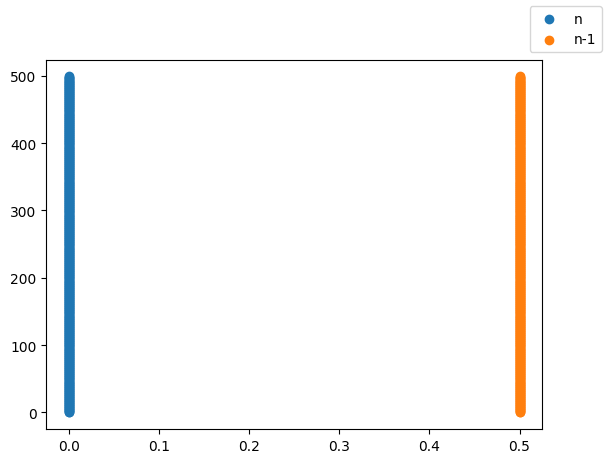

In [2]:
num_particles = 500

use_dimod_exact_solver = False

part_coords_n = np.zeros((num_particles,2))
part_coords_nm1 = np.zeros((num_particles,2))

for i in range(np.shape(part_coords_n)[0]):
    part_coords_n[i,:] = [0, i]
    part_coords_nm1[i,:] = [0.5*1, i]

fig_initial, axs_initial = plt.subplots(1,1)
axs_initial.scatter(part_coords_n[:,0], part_coords_n[:,1], label="n")
axs_initial.scatter(part_coords_nm1[:,0], part_coords_nm1[:,1], label="n-1")
fig_initial.legend()
fig_initial.show()

correct_sol = np.zeros(num_particles*num_particles)
for i in range(1, num_particles+1):
    correct_sol[(i-1)*num_particles + i -1] = 1.

print(correct_sol)

In [3]:
distances = distance_matrix.calc_phi_ij(part_coords_n, part_coords_nm1)
#Q_dist_diag = q_matrix.q_dist_diag(distances)
Q_dist_diag_sparse = q_matrix.q_dist_diag_sparse(distances)
print('generated Q_dist_diag')
#print(Q_dist_diag_sparse)
#assert (Q_dist_diag_sparse.toarray() == Q_dist_diag).all(), 'Q_dist_diag_sparse is not equal to Q_dist_diag'
#with np.printoptions(precision=3):
#    print(Q_dist_diag)
#Q_part = q_matrix.q_part(np.shape(distances)[0])
Q_part_sparse = q_matrix.q_part_sparse(np.shape(distances)[0])
print('generated Q_part_diag')
#print(Q_part)
#print(Q_part_sparse.toarray())
#assert (Q_part_sparse.toarray() == Q_part).all(), 'Q_part_sparse is not equal to Q_part'
#Q_pos = q_matrix.q_pos(np.shape(distances)[0])
Q_pos_sparse = q_matrix.q_pos_sparse(np.shape(distances)[0])
print('generated Q_pos_diag')
#assert (Q_pos_sparse.toarray() == Q_pos).all(), 'Q_pos_sparse is not equal to Q_pos'

generated Q_dist_diag
   i =  0
   i =  1
   i =  2
   i =  3
   i =  4
   i =  5
   i =  6
   i =  7
   i =  8
   i =  9
   i =  10
   i =  11
   i =  12
   i =  13
   i =  14
   i =  15
   i =  16
   i =  17
   i =  18
   i =  19
   i =  20
   i =  21
   i =  22
   i =  23
   i =  24
   i =  25
   i =  26
   i =  27
   i =  28
   i =  29
   i =  30
   i =  31
   i =  32
   i =  33
   i =  34
   i =  35
   i =  36
   i =  37
   i =  38
   i =  39
   i =  40
   i =  41
   i =  42
   i =  43
   i =  44
   i =  45
   i =  46
   i =  47
   i =  48
   i =  49
   i =  50
   i =  51
   i =  52
   i =  53
   i =  54
   i =  55
   i =  56
   i =  57
   i =  58
   i =  59
   i =  60
   i =  61
   i =  62
   i =  63
   i =  64
   i =  65
   i =  66
   i =  67
   i =  68
   i =  69
   i =  70
   i =  71
   i =  72
   i =  73
   i =  74
   i =  75
   i =  76
   i =  77
   i =  78
   i =  79
   i =  80
   i =  81
   i =  82
   i =  83
   i =  84
   i =  85
   i =  86
   i =  87
   i =  88
   i =  8

In [4]:
#Q_array = Q_dist_diag + Q_part + Q_pos
Q_array_sparse = Q_dist_diag_sparse + Q_part_sparse + Q_pos_sparse
#assert (Q_array_sparse.toarray() == Q_array).all(), 'Q_array_sparse is not equal to Q_array'

In [7]:
gurobi_model = gurobipy.Model()
x = gurobi_model.addMVar(num_particles*num_particles, vtype='b', name='x')
#Q = gurobi_model.addMVar(Q_array, name='Q')
gurobi_model.setObjective(x @ Q_array_sparse @ x)
gurobi_model.Params.Presolve = 0
print('    NumVars = ',gurobi_model.NumVars)
gurobi_model.optimize()
print('    NumVars = ',gurobi_model.NumVars)
print(x.X)
print()
print ('Is solution correct? --> ', (x.X == correct_sol).all())
print('Runtime = ', gurobi_model.Runtime)

Set parameter Presolve to value 0
    NumVars =  0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Academic license 2450895 - for non-commercial use only - registered to ol___@rwth-aachen.de
Optimize a model with 0 rows, 250000 columns and 0 nonzeros
Model fingerprint: 0x3e25ff7b
Model has 125000000 quadratic objective terms
Variable types: 0 continuous, 250000 integer (250000 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-01, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -750.0000000
Presolve removed 0 rows and 0 columns (presolve time = 6s) ...

Explored 0 nodes (0 simplex iterations) in 707.13 seconds (8

In [6]:
scipy_tic = time.time()
scipy_row_ind, scipy_col_ind = sp.optimize.linear_sum_assignment(distances)
scipy_toc = time.time()
scipy_runtime = scipy_toc - scipy_tic
scipy_x = np.zeros(num_particles*num_particles)
for i in range(len(scipy_row_ind)):
    scipy_x[scipy_row_ind[i]*num_particles + scipy_col_ind[i]] = 1
print(scipy_x)
print()
print ('Is solution correct? --> ', (x.X == correct_sol).all())
print('Runtime = ', scipy_runtime)

[1. 0. 0. ... 0. 0. 1.]

Is solution correct? -->  True
Runtime =  0.4249992370605469
